In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
# Random seeds
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Function to build model
def build_model(activation_function):
    model = keras.Sequential()

    # Input layer
    model.add(layers.Dense(128, activation=activation_function, input_shape=(784,)))

    # Six hidden layers
    for _ in range(5):
        model.add(layers.Dense(128, activation=activation_function))
    # No regularisation Method
    model.add(layers.Dense(128, activation=activation_function))
    model.add(layers.Dropout(0.2))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Learning Report
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# SIGMOID MODEL
sigmoid_model = build_model('sigmoid')

history_sigmoid = sigmoid_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
      verbose=1
)

# ADD EPOCH TABLE HERE
epoch_table_sigmoid = pd.DataFrame({
    "Epoch": range(1, len(history_sigmoid.history['accuracy'])+1),
    "Train Accuracy": history_sigmoid.history['accuracy'],
    "Val Accuracy": history_sigmoid.history['val_accuracy'],
    "Train Loss": history_sigmoid.history['loss'],
    "Val Loss": history_sigmoid.history['val_loss']
})

print("Epoch Table Sigmoid:",epoch_table_sigmoid)

test_loss_s, test_acc_s = sigmoid_model.evaluate(x_test, y_test)
print("Sigmoid Test Accuracy:", test_acc_s)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2642 - loss: 1.8374 - val_accuracy: 0.7607 - val_loss: 0.6924
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7833 - loss: 0.5930 - val_accuracy: 0.8380 - val_loss: 0.4107
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8857 - loss: 0.3625 - val_accuracy: 0.9323 - val_loss: 0.2540
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9418 - loss: 0.2249 - val_accuracy: 0.9439 - val_loss: 0.2130
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9520 - loss: 0.1796 - val_accuracy: 0.9421 - val_loss: 0.2074
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9608 - loss: 0.1485 - val_accuracy: 0.9483 - val_loss: 0.1966
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9661 - loss: 0.1283 - val_accuracy: 0.9539 - val_loss: 0.1797
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9699 - loss: 0.1106 -

In [23]:
# TANH MODEL
tanh_model = build_model('tanh')

history_tanh = tanh_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
epoch_table_tanh = pd.DataFrame({
    "Epoch": range(1, len(history_tanh.history['accuracy'])+1),
    "Train Accuracy": history_tanh.history['accuracy'],
    "Val Accuracy": history_tanh.history['val_accuracy'],
    "Train Loss": history_tanh.history['loss'],
    "Val Loss": history_tanh.history['val_loss']
})

print("Epoch Table Tanh:",epoch_table_tanh)

test_loss_t, test_acc_t = tanh_model.evaluate(x_test, y_test)
print("Tanh Test Accuracy:", test_acc_t)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8578 - loss: 0.4640 - val_accuracy: 0.9408 - val_loss: 0.2083
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9434 - loss: 0.1941 - val_accuracy: 0.9530 - val_loss: 0.1749
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9599 - loss: 0.1421 - val_accuracy: 0.9551 - val_loss: 0.1662
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9677 - loss: 0.1114 - val_accuracy: 0.9603 - val_loss: 0.1565
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9724 - loss: 0.0952 - val_accuracy: 0.9641 - val_loss: 0.1362
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9761 - loss: 0.0840 - val_accuracy: 0.9650 - val_loss: 0.1295
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9773 - loss: 0.0785 - val_accuracy: 0.9686 - val_loss: 0.1258
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9823 - loss: 0.0628

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


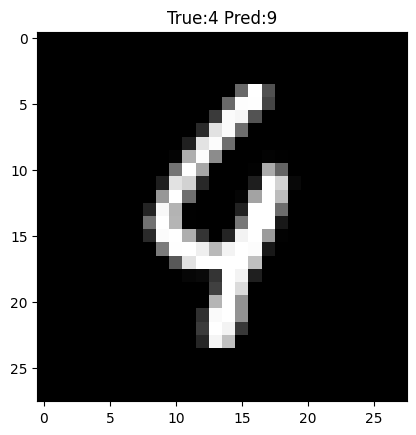

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



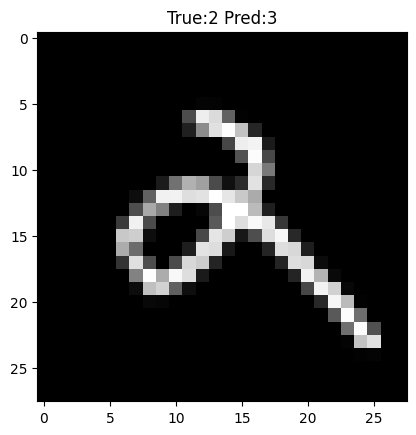

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



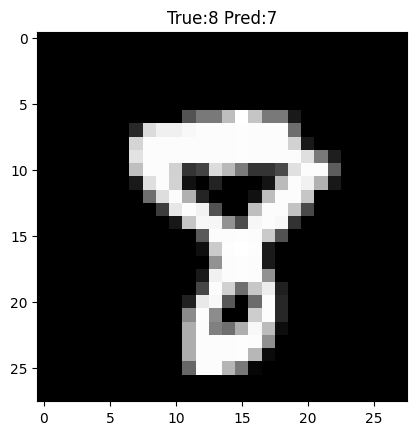

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



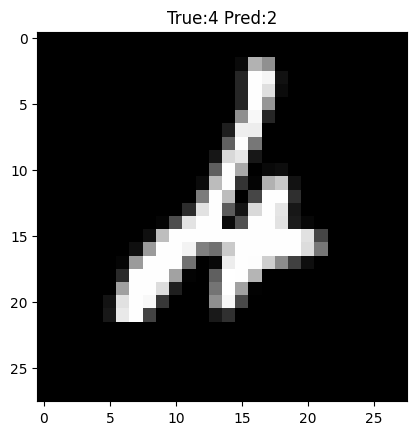

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



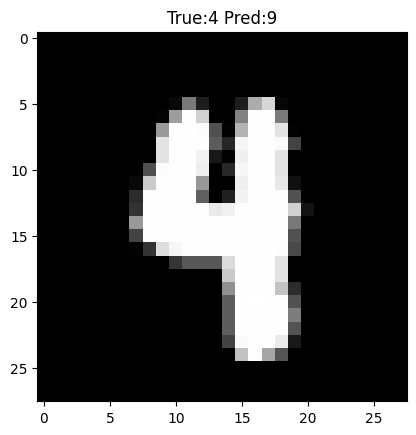

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [24]:
# Make predictions
y_pred = np.argmax(tanh_model.predict(x_test), axis=1)

# MISCLASSIFIED INDICES
mis = np.where(y_pred != np.argmax(y_test, axis=1))[0][:5]

for i in mis:
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True:{np.argmax(y_test[i])} Pred:{y_pred[i]}")
    plt.show()

    print(classification_report(np.argmax(y_test, axis=1), y_pred))


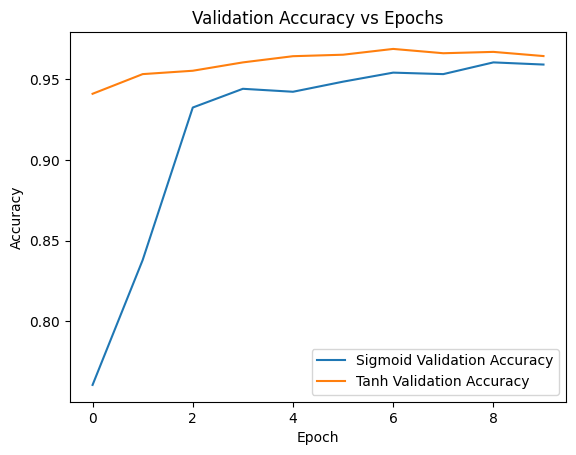

In [25]:
# Accuracy Plot

plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Validation Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Validation Accuracy')

plt.title("Validation Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Validation_Accuracy_Comparison.png")
plt.show()

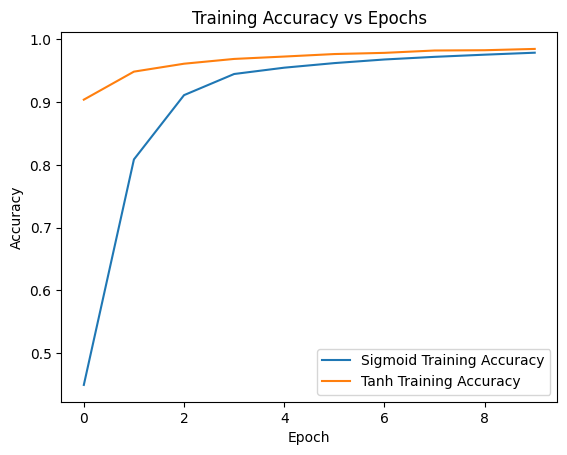

In [26]:
# Training Accuracy Plot

plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Training Accuracy')
plt.plot(history_tanh.history['accuracy'], label='Tanh Training Accuracy')
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Training_Accuracy_Comparison.png")
plt.show()

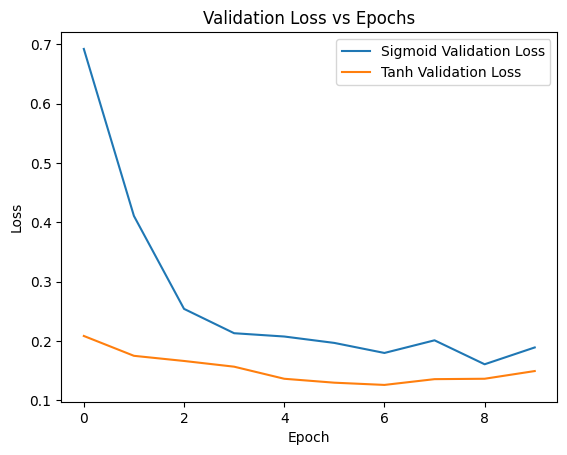

In [27]:
# Valiation Loss vs Epoch
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Validation Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Validation Loss')

plt.title("Validation Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Validation_Loss_&_Epoch_Comparison.png")
plt.show()

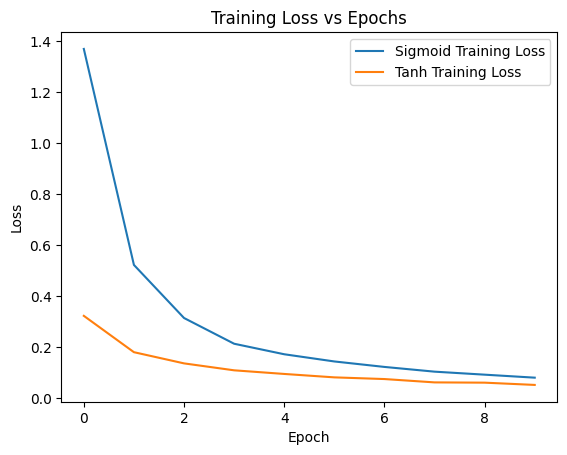

In [28]:
# Training Loss vs Epoch

plt.plot(history_sigmoid.history['loss'], label='Sigmoid Training Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Training Loss')
plt.title("Training Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Training_Loss_&_Epoch_Comparison.png")
plt.show()

In [29]:
# Results Table
results = pd.DataFrame({
    "Model": ["Sigmoid", "Tanh"],
    "Test Accuracy": [test_acc_s, test_acc_t],
    "Test Loss": [test_loss_s, test_loss_t],
     "Final Training Accuracy": [history_sigmoid.history['accuracy'][-1],history_tanh.history['accuracy'][-1]],
     "Final Validation Accuracy": [history_sigmoid.history['val_accuracy'][-1],history_tanh.history['val_accuracy'][-1]],
})

print(results)

     Model  Test Accuracy  Test Loss  Final Training Accuracy  \
0  Sigmoid         0.9594   0.193678                 0.978604   
1     Tanh         0.9665   0.144778                 0.984625   

   Final Validation Accuracy  
0                   0.958917  
1                   0.964167  


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


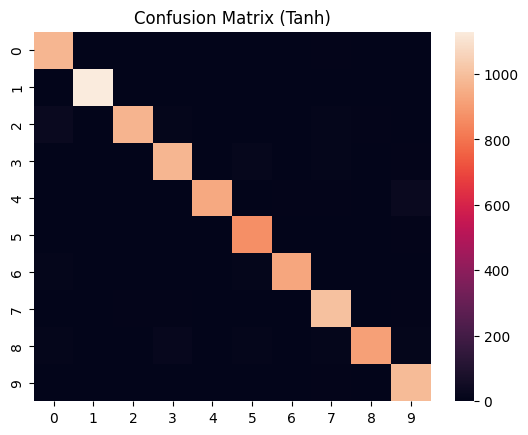

In [32]:
import seaborn as sns

# Confusion Matrix (Tanh)
y_pred = np.argmax(tanh_model.predict(x_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

sns.heatmap(cm, annot=False)
plt.title("Confusion Matrix (Tanh)")
plt.savefig("confusion_matrix.png")
plt.show()